<a href="https://colab.research.google.com/github/snowman74/Neural-Networks/blob/main/%D0%9F%D1%80%D0%BE%D1%81%D1%82%D1%8B%D0%B5%20%D0%BF%D0%BE%D0%BB%D0%BD%D0%BE%D1%81%D0%B2%D1%8F%D0%B7%D0%BD%D1%8B%D0%B5%20%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5%20%D1%81%D0%B5%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# импорт библиотек
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import pylab
from google.colab import files
import matplotlib.pyplot as plt
from PIL import Image
from skimage.transform import resize
from PIL import ImageOps

%matplotlib inline

In [ ]:
# создание модели нейросети
model = Sequential()
model.add(Dense(800, input_dim = 784, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# описание
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# загрузка базы данных mnist
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


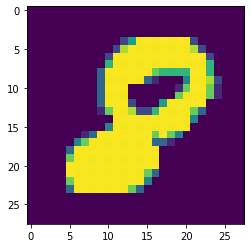

In [ ]:
# смотрим что внутри
plt.imshow(Image.fromarray(x_train_orig[1873]))
plt.show()

In [ ]:
# смотрим что нарисовано на картинке
y_train_orig[1873]

8

In [ ]:
# переводим в формат 784*1
x_train = x_train_orig.reshape(60000, 784)
x_test = x_test_orig.reshape(10000, 784)
print(x_train_orig.shape)
print(x_train.shape)

(60000, 28, 28)
(60000, 784)


In [ ]:
# нормализуем входные данные
x_train = x_train.astype('float32')
x_train = x_train / 255
x_test = x_test.astype('float32')
x_test = x_test / 255

In [ ]:
# преобразуем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train_orig, 10)
y_test = utils.to_categorical(y_test_orig, 10)
print(y_train.shape)

(60000, 10)


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

Epoch 1/15
469/469 [==============================] - 1s 2ms/step - loss: 0.2087 - accuracy: 0.9379
Epoch 2/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0776 - accuracy: 0.9759
Epoch 3/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0491 - accuracy: 0.9848
Epoch 4/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0351 - accuracy: 0.9887
Epoch 5/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0266 - accuracy: 0.9915
Epoch 6/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0215 - accuracy: 0.9929
Epoch 7/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0169 - accuracy: 0.9942
Epoch 8/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0157 - accuracy: 0.9949
Epoch 9/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0137 - accuracy: 0.9954
Epoch 10/15
469/469 [==============================] - 1s 2ms/step - loss: 0.0133 - accuracy: 0.9955

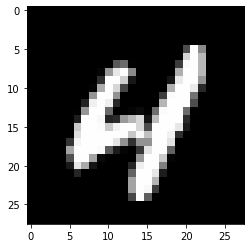

In [ ]:
n = 770
plt.imshow(Image.fromarray(x_test_orig[n]).convert('RGBA'))
plt.show()

In [ ]:
x = x_test[n]
print(x.shape)

(784,)


In [ ]:
x = np.expand_dims(x, axis=0)
print(x.shape)

(1, 784)


In [ ]:
prediction = model.predict(x)
print(prediction)
print(np.argmax(prediction))

[[6.7761504e-17 6.8157475e-14 1.1161186e-12 1.7209748e-18 1.0000000e+00
  7.5432933e-18 1.1007861e-13 5.9349349e-17 1.1262178e-17 1.6474867e-14]]
4


In [ ]:
print(y_test_orig[n])

6


# Играемся с параметрами

**Вариант 2**
Проведите серию экспериментов по перебору гиперпараметров нейронной сети, созданной на занятии.
  1. Поменяйте количество нейронов в сети, используя следующие значения:

      один слой 10 нейронов

      один слой 100 нейронов

      один слой 5000 нейронов

  2. Поменяйте активационную функцию в скрытых слоях с relu на linear.
  3. Поменяйте размеры batch_size:

      1

      10

      100

      Вся база (60000)

  4. Запишите в таблицу получившиеся точности.
  5. Напишите выводы по результатам проведенных тестов.

In [ ]:
# для начала изменим размер второго слоя (поставим 10)
model_10 = Sequential()
model_10.add(Dense(800, input_dim = 784, activation='relu'))
model_10.add(Dense(10, activation='relu'))
model_10.add(Dense(10, activation='softmax'))
model_10.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_10.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

Epoch 1/15
469/469 [==============================] - 2s 4ms/step - loss: 0.3708 - accuracy: 0.8943
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1157 - accuracy: 0.9672
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0742 - accuracy: 0.9779
Epoch 4/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0504 - accuracy: 0.9845
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0365 - accuracy: 0.9887
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0272 - accuracy: 0.9917
Epoch 7/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0213 - accuracy: 0.9934
Epoch 8/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0165 - accuracy: 0.9951
Epoch 9/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0132 - accuracy: 0.9961
Epoch 10/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0099 - accuracy: 0.9973

In [ ]:
import pandas as pd

In [ ]:
conclusion = pd.DataFrame(index=['10 нейронов', '100 нейронов', '5000 нейронов',
                                 'функция активации linear', 'batch_size=1',
                                 'batch_size=10', 'batch_size=60000'], columns=['Точность'])
conclusion.iloc[0, 0] = 0.9962

In [ ]:
conclusion

,Точность
10 нейронов,0.9967
100 нейронов,NaN
5000 нейронов,NaN
функция активации linear,NaN
batch_size=1,NaN
batch_size=10,NaN
batch_size=60000,NaN


In [ ]:
# для второго слоя поставим 100 нейронов
model_100 = Sequential()
model_100.add(Dense(800, input_dim = 784, activation='relu'))
model_100.add(Dense(100, activation='relu'))
model_100.add(Dense(10, activation='softmax'))
model_100.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_100.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

Epoch 1/15
469/469 [==============================] - 2s 4ms/step - loss: 0.2284 - accuracy: 0.9335
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0830 - accuracy: 0.9746
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0532 - accuracy: 0.9831
Epoch 4/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0369 - accuracy: 0.9883
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0262 - accuracy: 0.9914
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0207 - accuracy: 0.9934
Epoch 7/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0157 - accuracy: 0.9948
Epoch 8/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0137 - accuracy: 0.9957
Epoch 9/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0133 - accuracy: 0.9953
Epoch 10/15
469/469 [==============================] - 2s 4ms/step - loss: 0.0129 - accuracy: 0.9956

In [ ]:
conclusion.iloc[1, 0] = 0.9968
conclusion

,Точность
10 нейронов,0.9962
100 нейронов,0.9968
5000 нейронов,NaN
функция активации linear,NaN
batch_size=1,NaN
batch_size=10,NaN
batch_size=60000,NaN


In [ ]:
# для второго слоя поставим 5000 нейронов
model_5000 = Sequential()
model_5000.add(Dense(800, input_dim = 784, activation='relu'))
model_5000.add(Dense(5000, activation='relu'))
model_5000.add(Dense(10, activation='softmax'))
model_5000.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_5000.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

Epoch 1/15
469/469 [==============================] - 3s 7ms/step - loss: 0.1854 - accuracy: 0.9432
Epoch 2/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0740 - accuracy: 0.9765
Epoch 3/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0512 - accuracy: 0.9835
Epoch 4/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0375 - accuracy: 0.9881
Epoch 5/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0292 - accuracy: 0.9906
Epoch 6/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0295 - accuracy: 0.9907
Epoch 7/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0204 - accuracy: 0.9934
Epoch 8/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0247 - accuracy: 0.9920
Epoch 9/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0199 - accuracy: 0.9938
Epoch 10/15
469/469 [==============================] - 3s 7ms/step - loss: 0.0205 - accuracy: 0.9934

In [ ]:
conclusion.iloc[2, 0] = 0.9961
conclusion

,Точность
10 нейронов,0.9962
100 нейронов,0.9968
5000 нейронов,0.9961
функция активации linear,NaN
batch_size=1,NaN
batch_size=10,NaN
batch_size=60000,NaN


In [ ]:
# для второго слоя поставим 5000 нейронов
model_linear = Sequential()
model_linear.add(Dense(800, input_dim = 784, activation='linear'))
model_linear.add(Dense(5000, activation='linear'))
model_linear.add(Dense(10, activation='linear'))
model_linear.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

Epoch 1/15
469/469 [==============================] - 2s 4ms/step - loss: 9.5753e-07 - accuracy: 1.0000
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 7.7809e-07 - accuracy: 1.0000
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 6.2011e-07 - accuracy: 1.0000
Epoch 4/15
469/469 [==============================] - 2s 4ms/step - loss: 4.8719e-07 - accuracy: 1.0000
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 3.9460e-07 - accuracy: 1.0000
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 3.2049e-07 - accuracy: 1.0000
Epoch 7/15
469/469 [==============================] - 2s 4ms/step - loss: 2.6194e-07 - accuracy: 1.0000
Epoch 8/15
469/469 [==============================] - 2s 4ms/step - loss: 2.1821e-07 - accuracy: 1.0000
Epoch 9/15
469/469 [==============================] - 2s 4ms/step - loss: 1.7962e-07 - accuracy: 1.0000
Epoch 10/15
469/469 [==============================] - 2s 4ms/st

In [ ]:
conclusion.iloc[3, 0] = 1.000
conclusion

,Точность
10 нейронов,0.9962
100 нейронов,0.9968
5000 нейронов,0.9961
функция активации linear,1
batch_size=1,NaN
batch_size=10,NaN
batch_size=60000,NaN


In [ ]:
model_b1 = Sequential()
model_b1.add(Dense(800, input_dim=784, activation='relu'))
model_b1.add(Dense(400, activation='relu'))
model_b1.add(Dense(10, activation='softmax'))
model_b1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_b1.fit(x_train, y_train, batch_size=1, epochs=15, verbose=1)

Epoch 1/15
60000/60000 [==============================] - 170s 3ms/step - loss: 0.2831 - accuracy: 0.9267
Epoch 2/15
60000/60000 [==============================] - 171s 3ms/step - loss: 0.1882 - accuracy: 0.9573
Epoch 3/15
60000/60000 [==============================] - 169s 3ms/step - loss: 0.1699 - accuracy: 0.9653
Epoch 4/15
60000/60000 [==============================] - 171s 3ms/step - loss: 0.1575 - accuracy: 0.9676
Epoch 5/15
60000/60000 [==============================] - 169s 3ms/step - loss: 0.1447 - accuracy: 0.9708
Epoch 6/15
60000/60000 [==============================] - 170s 3ms/step - loss: 0.1372 - accuracy: 0.9736
Epoch 7/15
60000/60000 [==============================] - 171s 3ms/step - loss: 0.1368 - accuracy: 0.9752
Epoch 8/15
60000/60000 [==============================] - 169s 3ms/step - loss: 0.1367 - accuracy: 0.9760
Epoch 9/15
60000/60000 [==============================] - 170s 3ms/step - loss: 0.1409 - accuracy: 0.9775
Epoch 10/15
60000/60000 [=====================

In [ ]:
conclusion.iloc[4, 0] = 0.9797
conclusion

,Точность
10 нейронов,0.9962
100 нейронов,0.9968
5000 нейронов,0.9961
функция активации linear,1
batch_size=1,0.9797
batch_size=10,NaN
batch_size=60000,NaN


In [ ]:
model_b10 = Sequential()
model_b10.add(Dense(800, input_dim=784, activation='relu'))
model_b10.add(Dense(400, activation='relu'))
model_b10.add(Dense(10, activation='softmax'))
model_b10.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_b10.fit(x_train, y_train, batch_size=10, epochs=15, verbose=1)

Epoch 1/15
6000/6000 [==============================] - 22s 4ms/step - loss: 0.1873 - accuracy: 0.9424
Epoch 2/15
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0924 - accuracy: 0.9718
Epoch 3/15
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0705 - accuracy: 0.9790
Epoch 4/15
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0577 - accuracy: 0.9834
Epoch 5/15
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0492 - accuracy: 0.9855
Epoch 6/15
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0440 - accuracy: 0.9878
Epoch 7/15
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0404 - accuracy: 0.9890
Epoch 8/15
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0393 - accuracy: 0.9898
Epoch 9/15
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0358 - accuracy: 0.9907
Epoch 10/15
6000/6000 [==============================] - 23s 4ms/step - l

In [ ]:
conclusion.iloc[5, 0] = 0.9939
conclusion

,Точность
10 нейронов,0.9962
100 нейронов,0.9968
5000 нейронов,0.9961
функция активации linear,1
batch_size=1,0.9797
batch_size=10,0.9939
batch_size=60000,NaN


In [ ]:
model_b60k = Sequential()
model_b60k.add(Dense(800, input_dim=784, activation='relu'))
model_b60k.add(Dense(400, activation='relu'))
model_b60k.add(Dense(10, activation='softmax'))
model_b60k.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_b60k.fit(x_train, y_train, batch_size=10, epochs=15, verbose=1)

Epoch 1/15
6000/6000 [==============================] - 22s 4ms/step - loss: 0.1881 - accuracy: 0.9424
Epoch 2/15
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0922 - accuracy: 0.9721
Epoch 3/15
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0704 - accuracy: 0.9793
Epoch 4/15
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0566 - accuracy: 0.9832
Epoch 5/15
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0499 - accuracy: 0.9863
Epoch 6/15
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0400 - accuracy: 0.9886
Epoch 7/15
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0382 - accuracy: 0.9895
Epoch 8/15
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0366 - accuracy: 0.9904
Epoch 9/15
6000/6000 [==============================] - 22s 4ms/step - loss: 0.0329 - accuracy: 0.9914
Epoch 10/15
6000/6000 [==============================] - 22s 4ms/step - l

In [ ]:
conclusion.iloc[6, 0] = 0.9946
conclusion

,Точность
10 нейронов,0.9962
100 нейронов,0.9968
5000 нейронов,0.9961
функция активации linear,1
batch_size=1,0.9797
batch_size=10,0.9939
batch_size=60000,0.9946


Как видно из таблицы, в данной задаче число нейронов (первого Dense-слоя) не влияет на итоговую точность.

При изменении активационной функции на линейную, при обучении нейронки сразу видим единичную точность, вероятно здесь мы наблюдаем переобучение.

Размер единичного пакета влияет заметно (при размере=1 нейронка училась заметно дольше) и точность возрастает с увеличением размера пакета. Хотя особой разницы между 10 и 60 000 нет.

# Распознаем свою цифру

**Двойка!**

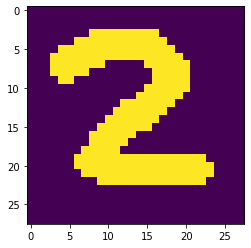

In [ ]:
test_image2 = Image.open("/content/drive/My Drive/2.png").convert('L')
# test_image = ImageOps.invert(test_image)

test_image2 = np.asarray(test_image2, dtype='float32')

plt.imshow(test_image2)

In [ ]:
test_image2 = resize(test_image2, (28, 28), anti_aliasing=True)
test_image2 = test_image2.astype('float32')
test_image2 = test_image2/255
i2 = test_image2.reshape(1, 784)

In [ ]:
prediction2 = model.predict(i2)
print(prediction2)
print('Прогноз нейросети:', np.argmax(prediction2))

[[5.8908437e-22 1.6215453e-14 9.9999964e-01 3.2360285e-07 5.7431345e-29
  4.4763703e-24 9.3756621e-22 6.2612045e-16 3.9102315e-13 1.1644725e-28]]
Прогноз нейросети: 2


**А теперь цифра 6!**

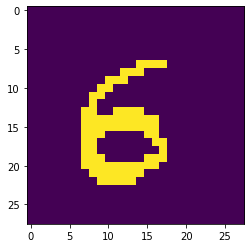

In [ ]:
test_image6 = Image.open("/content/drive/My Drive/6.png").convert('L')
# test_image = ImageOps.invert(test_image)

test_image6 = np.asarray(test_image6, dtype='float32')

plt.imshow(test_image6)

In [ ]:
test_image6 = resize(test_image6, (28, 28), anti_aliasing=True)
test_image6 = test_image6.astype('float32')
test_image6 = test_image6/255
i6 = test_image6.reshape(1, 784)

In [ ]:
prediction6 = model.predict(i6)
print(prediction6)
print('Прогноз нейросети:', np.argmax(prediction6))

[[2.5058958e-14 4.0357957e-13 3.2586598e-08 3.8703166e-11 4.2426698e-14
  7.3162344e-04 9.7544038e-01 7.1863546e-17 2.3827979e-02 1.8943621e-14]]
Прогноз нейросети: 6


**Пробуем с рукописными!**

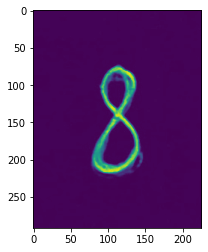

In [ ]:
plt.imshow(img)
plt.show()
# исходное изображение (предварительно инвертировал в пэинте)

[[0.02486821 0.02464871 0.04534081 0.04746104 0.02260038 0.5746256
  0.07033619 0.02589484 0.12232529 0.04189888]]
5


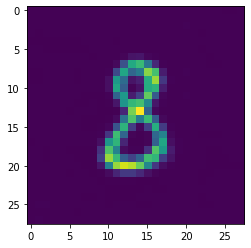

In [ ]:
test_image8 = Image.open("/content/drive/My Drive/8.png").convert('L')


test_image8 = np.asarray(test_image8, dtype='float32')
test_image8 = resize(test_image8, (28, 28), anti_aliasing=True)
plt.imshow(test_image8)

test_image8 = test_image8.astype('float32')
test_image8 = test_image6/255
i8 = test_image8.reshape(1, 784)

In [ ]:
prediction8 = model.predict(i8)
print(prediction8)
print('Прогноз нейросети:', np.argmax(prediction8)) 
# почему то всё равно пятерка при таком способе, хотя при предыдущих цифр (в самом редакторе) все было ОК
# не подскажете в чем дело, уважаемые кураторы?

[[0.02486821 0.02464871 0.04534081 0.04746104 0.02260038 0.5746256
  0.07033619 0.02589484 0.12232529 0.04189888]]
Прогноз нейросети: 5


**Попробуем иначе**

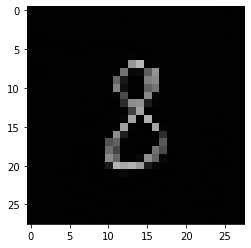

Прогноз нейросети: 8


In [ ]:
img = image.load_img("/content/drive/My Drive/8.png", target_size=(28, 28), color_mode = 'grayscale')
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()
x_img = image.img_to_array(img) 
x_img = x_img.reshape(1, 784)
x_img /= 255.0
prediction = model.predict(x_img)
print('Прогноз нейросети:', np.argmax(prediction))